In [2]:
from pymongo import MongoClient
import os 

riot_api_key = os.environ.get('RIOT_API_KEY')
client = MongoClient('MONGO_DB_PATH')
database = client.defaultdb

In [4]:
import random
from tqdm.notebook import tqdm 

tier_list = ['IRON', 'BRONZE', 'SILVER', 'GOLD', 'EMERALD', 'PLATINUM', 'DIAMOND', 'MASTER', 'GRANDMASTER', 'CHALLENGER']
division_list = ['I', 'II', 'III', 'IV'][::-1]

involved_summoners = {}
involved_summoners_reduced = {}
total_players={}

for tier in tqdm(tier_list):

    if tier not in ['MASTER', 'GRANDMASTER', 'CHALLENGER']:

        involved_summoners[f'{tier}'] = 0
        
        for division in division_list:
            
            db_to_traverse = database['list'][tier][division]
            involved_summoners[f'{tier}'] += len(list(db_to_traverse.find({})))

    else: 
        db_to_traverse = database['list'][tier]
        involved_summoners[f'{tier}'] = len(list(db_to_traverse.find({})))

  0%|          | 0/10 [00:00<?, ?it/s]

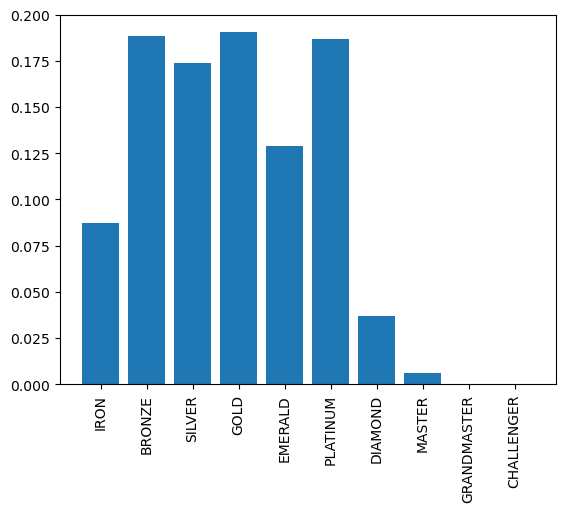

In [5]:
import matplotlib.pyplot as plt
total = sum(list(involved_summoners.values()))
plt.bar(list(involved_summoners.keys()), list(x / total for x in involved_summoners.values()))
plt.xticks(rotation=90);

In [6]:
import pickle

with open('player_balance.pickle', 'wb') as handle:
    pickle.dump(involved_summoners, handle, protocol=pickle.HIGHEST_PROTOCOL)